In [87]:
import paddle
import paddle.nn.functional as F
import numpy as np
import pandas as pd
import os
from paddle import nn
from PIL import Image
from paddle.distributed import fleet, get_rank
from visualdl import LogWriter
import matplotlib.pyplot as plt
from paddle.vision.transforms import *

IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCH_NUM = 5
logwriter = LogWriter(logdir='./runs')

print(paddle.__version__)

2.4.1


In [ ]:
def transform(img):
    # 基本变换
    imgs = np.array([img,rotate(img,90),rotate(img,180),rotate(img,270),hflip(rotate(img,270)),hflip(rotate(img,90)),hflip(img)])
    temp = []
    # 提高亮度
    for img in imgs:
        temp.append(adjust_brightness(img,1.7))
        temp.append(adjust_brightness(img,3))
        temp.append(adjust_brightness(img,5))
    imgs = np.concatenate((imgs, np.array(temp)))
    temp = []
    for img in imgs:
        temp.append(adjust_contrast(img,3))
        temp.append(adjust_contrast(img,1.7))
        temp.append(adjust_contrast(img,-2))
    imgs = np.concatenate((imgs, np.array(temp)))
    temp = []
    for img in imgs:
        temp.append(adjust_hue(img,0.5))
    imgs = np.concatenate((imgs, np.array(temp)))
    return imgs

In [198]:
# 定义数据集
class MyDataset(paddle.io.Dataset):
    def __init__(self, img_dir='data/PALM-Training400/', csv_dir='data/Classification.csv') -> None:
        super(MyDataset, self).__init__()
        if csv_dir is None:
            self.csvfile = None
            self.filedir = os.listdir(img_dir)
        else:
            self.csvfile = pd.read_csv(csv_dir)
        self.imgpath = img_dir
        pass
    def __len__(self):
        if self.csvfile is None:
            return len(self.filedir)
        else:
            return len(self.csvfile)
        pass
    def __getitem__(self, idx):
        if self.csvfile is None:
            img = np.reshape(transform(np.array(Image.open(self.imgpath+os.sep+self.filedir[idx]).resize((IMAGE_SIZE,IMAGE_SIZE))).astype('float32')),(3,IMAGE_SIZE,IMAGE_SIZE,IMAGE_SIZE))/256.
            lab = self.filedir[idx]
        else:
            img = np.reshape(transform(np.array(Image.open(self.imgpath+os.sep+self.csvfile['imgName'][idx]).resize((IMAGE_SIZE,IMAGE_SIZE)))),(3,IMAGE_SIZE,IMAGE_SIZE,IMAGE_SIZE))
            lab = np.array(self.csvfile['Label'][idx]).astype('float32')
        return img,lab
    pass
mydataset = MyDataset()

In [199]:
np.shape(mydataset[0][0])

(3, 224, 224, 224)

In [13]:
import paddle
from paddle.vision.transforms import *
paddle.vision.transforms.__all__

['BaseTransform',
 'Compose',
 'Resize',
 'RandomResizedCrop',
 'CenterCrop',
 'RandomHorizontalFlip',
 'RandomVerticalFlip',
 'Transpose',
 'Normalize',
 'BrightnessTransform',
 'SaturationTransform',
 'ContrastTransform',
 'HueTransform',
 'ColorJitter',
 'RandomCrop',
 'Pad',
 'RandomAffine',
 'RandomRotation',
 'RandomPerspective',
 'Grayscale',
 'ToTensor',
 'RandomErasing',
 'to_tensor',
 'hflip',
 'vflip',
 'resize',
 'pad',
 'affine',
 'rotate',
 'perspective',
 'to_grayscale',
 'crop',
 'center_crop',
 'adjust_brightness',
 'adjust_contrast',
 'adjust_hue',
 'normalize',
 'erase']

In [174]:
np.shape(transform(img))

(224, 224, 224, 3)

In [177]:
plt.figure()
for i,x in enumerate(transform(img)):
    plt.subplot(32,7,i+1)
    plt.imshow(x)
plt.subplots_adjust(bottom=0.5,left=0.5)
plt.show()

error: OpenCV(4.7.0) /io/opencv/modules/core/src/lut.cpp:366: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'LUT'


<Figure size 640x480 with 0 Axes>

In [45]:
from PIL import Image
img = np.array(Image.open('data/PALM-Training400/H0005.jpg').resize((224,224)))

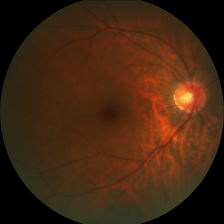

In [32]:
img.transpose(Image.FLIP_LEFT_RIGHT)

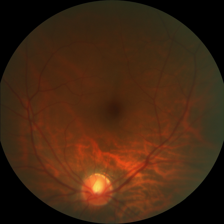

In [33]:
img.rotate(90)

In [ ]:
img.